In [6]:
!pip install pandas_ml 

In [7]:
#creating a cf data framework for our csv
import io
from google.colab import files 
uploaded=files.upload()

Saving creditcard.csv to creditcard (2).csv


In [0]:
import io
cf=pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [0]:
#important modules for data pre processing,plotting and model selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [0]:
import pandas_ml as pm


In [0]:
X = cf.iloc[:,:-1]
y = cf['Class']
Xn=scale(X)
pca=PCA(n_components=2)
Xs=pca.fit_transform(Xn)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.35,random_state=42)
cf2 = pm.ModelFrame(X_train, target=y_train)
sampler = cf2.imbalance.over_sampling.SMOTE()
sampled = cf2.fit_sample(sampler)

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred = dt.predict(X_test)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      99376   149    99525
True         142    16      158
__all__    99518   165    99683


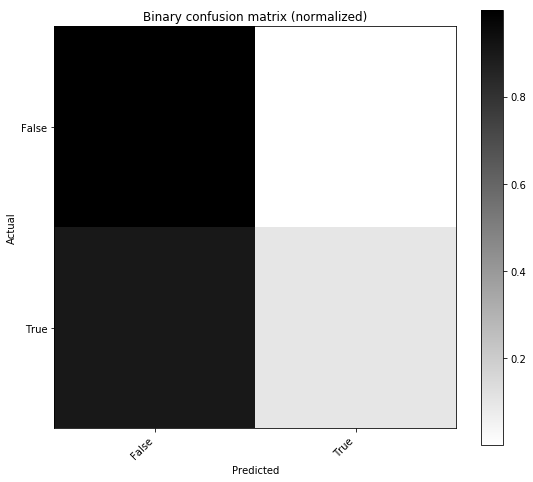

population: 99683
P: 158
N: 99525
PositiveTest: 165
NegativeTest: 99518
TP: 16
TN: 99376
FP: 149
FN: 142
TPR: 0.10126582278481013
TNR: 0.9985028887214268
PPV: 0.09696969696969697
NPV: 0.99857312245021
FPR: 0.0014971112785732228
FDR: 0.9030303030303031
FNR: 0.8987341772151899
ACC: 0.9970807459647081
F1_score: 0.09907120743034056
MCC: 0.09763290422392026
informedness: 0.0997687115062369
markedness: 0.09554281941990705
prevalence: 0.001585024527752977
LRP: 67.64081216549145
LRN: 0.9000816996794173
DOR: 75.14963607146233
FOR: 0.0014268775497899878


In [40]:
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
y_pred=np.array(dt.predict(X_test))
y_1=np.array(y_test)
confusion_matrix1 = ConfusionMatrix(y_1, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9970807459647081


In [42]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.0029192540352918754
